In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
data_dir = 'C://Users//swasa//Desktop/cell_images_2/'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [5]:
len(os.listdir(train_path+'\\selected\\'))

13

In [6]:
len(os.listdir(train_path+'\\non-selected\\'))

10

In [11]:
len(os.listdir(test_path+'\\selected\\'))

8

In [12]:
len(os.listdir(test_path+'\\non-selected\\'))

7

In [16]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'non-selected'):
    img = imread(test_path+'non-selected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

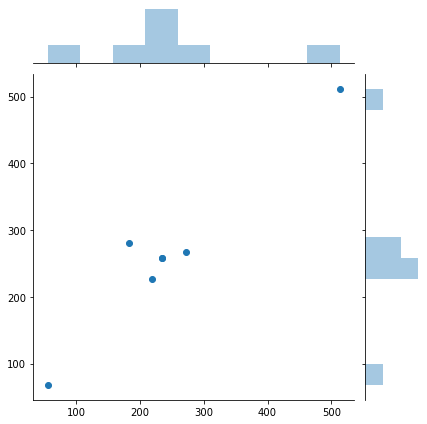

In [17]:
sns.jointplot(dim1,dim2)
# checking highest and lowest dimension size of all images

In [18]:
np.mean(dim1)

244.85714285714286

In [19]:
np.mean(dim2)

267.2857142857143

In [20]:
image_shape = (244,267,3)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')

In [23]:
image_gen.flow_from_directory(train_path)

Found 23 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory(test_path)

Found 15 images belonging to 2 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

In [27]:

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

# we are using sigmoid here because it is Binary Classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 265, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 132, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 130, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 65, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 55552)            

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [31]:
batch_size = 6

In [33]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size = image_shape[:2], color_mode = 'rgb', batch_size = batch_size, class_mode = 'binary')

Found 23 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size = image_shape[:2], color_mode = 'rgb', batch_size = batch_size, class_mode = 'binary', shuffle = False)

Found 15 images belonging to 2 classes.


In [35]:
train_image_gen.class_indices

{'non-selected': 0, 'selected': 1}

In [36]:
model.fit_generator(train_image_gen, epochs = 20, validation_data =  test_image_gen, callbacks = [early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 3 steps
Epoch 1/20
4/4 [==============================] - 7s 2s/step - loss: 492.5917 - accuracy: 0.2174 - val_loss: 0.9547 - val_accuracy: 0.8667
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 9.3739 - accuracy: 0.4783 - val_loss: 1.0454 - val_accuracy: 0.6667
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.5790 - accuracy: 0.7391 - val_loss: 1.4093 - val_accuracy: 0.7333


In [37]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

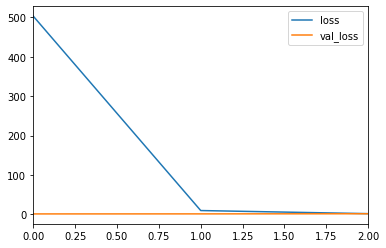

In [38]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

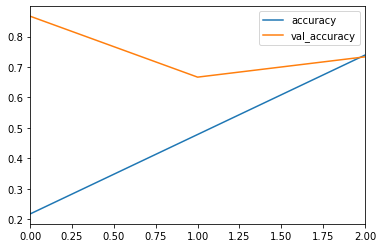

In [40]:
losses[['accuracy','val_accuracy']].plot()

In [41]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[1.4043248146772385, 0.6666667]

In [42]:
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [43]:
predictions = pred > 0.5

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.83      0.62      0.71         8

    accuracy                           0.73        15
   macro avg       0.75      0.74      0.73        15
weighted avg       0.76      0.73      0.73        15



In [47]:
from tensorflow.keras.preprocessing import image
check_image ='C:\\Users\\swasa\\Desktop\\check.png'

In [48]:
chck_img = image.load_img(check_image, target_size = image_shape)

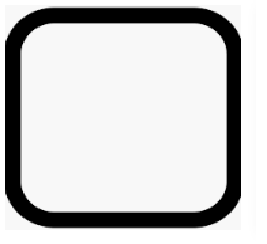

In [49]:
chck_img

In [50]:
my_img_arr = image.img_to_array(chck_img)

In [51]:
my_img_arr.shape

(244, 267, 3)

In [54]:
my_img_arr = np.expand_dims(my_img_arr, axis = 0)

In [55]:
my_img_arr.shape

(1, 244, 267, 3)

In [56]:
#if we don't use this, we will get the answer along with 'e' value
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [59]:
model.predict(my_img_arr)
# here we got zero hence the prediction is non-selected

array([[0.983883]], dtype=float32)

In [58]:
train_image_gen.class_indices

{'non-selected': 0, 'selected': 1}